<a href="https://colab.research.google.com/github/EbrahimiAmirHosein/Feature-Selection-and-Cancer-Detection/blob/main/Feature_Selection_and_Cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem - 1

## Download Data from Google-Drive


In [ ]:
'''
File Name : TCGA-BRCA.htseq_fpkm-uq_gene_name
File Link : https://drive.google.com/file/d/1YIdI0QDAuw1s630yIekdeFqZr7xBMUuU/view?usp=sharing
File Id : '1YIdI0QDAuw1s630yIekdeFqZr7xBMUuU'

'''
!gdown --id 1YIdI0QDAuw1s630yIekdeFqZr7xBMUuU

'''
File Name : TCGA-BRCA.pheno
File Link : https://drive.google.com/file/d/1knEp1HtMeBz6nSdsR-8EbNsvnQ33QPJI/view?usp=sharing
File Id : '1knEp1HtMeBz6nSdsR-8EbNsvnQ33QPJI'

'''
!gdown --id 1knEp1HtMeBz6nSdsR-8EbNsvnQ33QPJI

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YIdI0QDAuw1s630yIekdeFqZr7xBMUuU
To: /content/TCGA-BRCA.pheno.tsv
100% 38.8k/38.8k [00:00<00:00, 95.6MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1knEp1HtMeBz6nSdsR-8EbNsvnQ33QPJI
To: /content/TCGA-BRCA.htseq_fpkm-uq_gene_name.tsv
100% 361M/361M [00:03<00:00, 99.3MB/s]


# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder

# Reading Data

In [ ]:
gene_expr_df = pd.read_table("TCGA-BRCA.htseq_fpkm-uq_gene_name.tsv", index_col = False )
gene_expr_df = gene_expr_df.rename(columns={"Unnamed: 0": "sample_id"})

In [ ]:
'''

Transposing the gene_expr_df to have the features (gene) per columns, and samples per rows

'''

gene_expr_df = gene_expr_df.transpose()
gene_expr_df.columns = gene_expr_df.iloc[0].to_list()
gene_expr_df = gene_expr_df.tail(-1)
gene_expr_df['sample_id'] = gene_expr_df.index
gene_expr_df = gene_expr_df.reset_index()
gene_expr_df = gene_expr_df.drop(['index'], axis =1 )
gene_expr_df

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,.327,.328,TMEM272,.329,BLACAT1,.330,.331,.332,GIMAP1-GIMAP5,sample_id
0,15.668816,0.0,19.847757,16.527786,15.451178,14.941129,16.83133,19.526689,16.89174,18.484371,...,12.400428,0.0,9.820748,11.912473,7.491222,11.65211,0.0,9.810255,0.0,TCGA.E9.A1NI.01A
1,18.445279,10.460897,19.582869,15.682843,16.037555,16.620256,15.333753,19.916207,16.341906,17.888016,...,12.58591,0.0,9.096113,13.216321,14.463777,9.150917,0.0,7.727225,0.0,TCGA.A1.A0SP.01A
2,16.683041,14.0982,19.084218,17.45171,15.066195,17.213556,15.892686,18.572773,16.720162,18.329449,...,12.178634,9.684694,7.098429,11.795926,9.146758,12.428429,0.0,9.302039,0.0,TCGA.E2.A14T.01A
3,17.100722,13.612552,19.249375,16.104496,15.14595,15.289178,18.306263,18.543298,16.837037,18.477502,...,12.025867,10.959197,10.36449,10.849442,10.922986,11.325751,7.827715,9.898724,0.0,TCGA.AR.A24O.01A
4,17.344965,10.654193,18.979828,17.504722,14.97285,15.182838,16.089251,17.876285,16.425787,18.153345,...,10.668955,0.0,8.705397,12.409859,0.0,10.927505,0.0,11.236351,0.0,TCGA.A8.A09K.01A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,17.868492,9.093125,18.952168,17.357005,15.334997,14.219424,16.752344,18.381867,16.323012,18.678683,...,12.506038,12.489336,9.895523,10.625298,0.0,11.364495,0.0,8.938914,0.0,TCGA.B6.A0RN.01A
1213,17.319686,11.998459,19.48444,17.370908,16.732317,15.338637,17.56658,19.882582,16.904526,18.546629,...,13.112576,0.0,8.413553,10.725508,0.0,9.466259,0.0,9.038987,0.0,TCGA.A8.A09W.01A
1214,16.765845,12.77579,19.551358,17.532099,15.611986,14.660789,17.263662,18.568886,18.040743,18.652336,...,13.087108,0.0,7.330713,12.029725,0.0,10.547515,0.0,12.533855,0.0,TCGA.E9.A1R5.01A
1215,19.398177,13.850298,21.670792,16.259507,16.235454,14.903649,15.612304,19.553328,16.556427,18.277881,...,12.205654,0.0,7.383941,9.277906,16.407012,11.822896,0.0,0.0,0.0,TCGA.B6.A409.01A


In [ ]:
pheno_df = pd.read_csv("TCGA-BRCA.pheno.tsv", sep='\t')
pheno_df = pheno_df.rename(columns={"Unnamed: 0": "sample_id"})
pheno_df

,sample_id,type,tissue_source_site,disease_type
0,TCGA.A2.A0CY.01A,Tumor,B6,Ductal and Lobular Neoplasms
1,TCGA.AO.A0J8.01A,Tumor,A8,Ductal and Lobular Neoplasms
2,TCGA.E2.A14N.01A,Tumor,BH,Ductal and Lobular Neoplasms
3,TCGA.BH.A1F0.11B,Tumor,BH,Ductal and Lobular Neoplasms
4,TCGA.BH.A0BZ.11A,Tumor,AC,Ductal and Lobular Neoplasms
...,...,...,...,...
608,TCGA.EW.A424.01A,Tumor,EW,Ductal and Lobular Neoplasms
609,TCGA.A8.A07L.01A,Tumor,AO,Ductal and Lobular Neoplasms
610,TCGA.BH.A0HI.01A,Tumor,A1,Ductal and Lobular Neoplasms
611,TCGA.PE.A5DD.01A,Tumor,E2,Ductal and Lobular Neoplasms


### Merging both datasets:
  Subseting the samples that are present in both files.

  Out of 1217 rows, only 588 are commmon in both datasets

In [ ]:
gene_expr_merged_df = pd.merge(pheno_df, gene_expr_df, on='sample_id', how='inner')
gene_expr_merged_df = gene_expr_merged_df.drop(['tissue_source_site','disease_type'] , axis = 1)
gene_expr_merged_df

,sample_id,type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,RPS4Y2,.327,.328,TMEM272,.329,BLACAT1,.330,.331,.332,GIMAP1-GIMAP5
0,TCGA.A2.A0CY.01A,Tumor,18.782026,0.0,19.361319,16.684798,15.555366,14.37104,15.185321,19.932684,...,0.0,12.648116,0.0,10.0899,11.182144,14.861179,9.922573,0.0,9.49511,0.0
1,TCGA.AO.A0J8.01A,Tumor,17.768535,12.386137,18.824546,17.331973,15.808005,16.250155,16.371688,18.157287,...,0.0,11.385353,8.573943,8.785703,12.335088,0.0,12.074706,0.0,7.196831,0.0
2,TCGA.E2.A14N.01A,Tumor,18.155222,11.70931,19.917749,16.025397,16.613364,15.698358,14.955033,19.03354,...,0.0,13.40513,0.0,10.343592,11.783761,15.958083,11.845234,0.0,10.903046,0.0
3,TCGA.BH.A1F0.11B,Tumor,18.861721,17.337847,19.361469,16.248498,14.380057,15.605566,17.890767,18.797806,...,0.0,12.114132,10.387685,8.532398,11.914599,13.137545,9.848,7.671617,9.420564,7.093035
4,TCGA.BH.A0BZ.11A,Tumor,18.580214,19.85305,18.94016,16.292713,14.234045,16.635651,19.015107,18.784831,...,0.0,11.873019,11.643387,7.47105,11.685564,10.257388,11.688161,0.0,8.67831,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,TCGA.EW.A424.01A,Tumor,17.972779,11.579762,19.408273,16.702496,15.475973,15.13655,16.10753,18.943737,...,0.0,13.715847,10.487047,10.394537,13.850258,13.152584,9.947328,0.0,9.519856,0.0
584,TCGA.A8.A07L.01A,Tumor,17.265731,0.0,20.09799,16.85819,16.862459,13.723452,16.319658,19.888376,...,0.0,12.436004,0.0,9.627007,0.0,0.0,12.680304,0.0,0.0,0.0
585,TCGA.BH.A0HI.01A,Tumor,16.897974,9.885735,19.237956,16.987303,14.886096,15.526247,16.317688,18.939644,...,0.0,11.595441,9.115491,9.519778,9.420221,8.577939,9.1602,0.0,7.73648,0.0
586,TCGA.PE.A5DD.01A,Tumor,17.233321,12.968377,18.957937,16.912248,15.963849,16.121715,17.405456,18.481603,...,0.0,11.13884,0.0,11.71326,12.180484,0.0,12.59804,0.0,8.174832,0.0


In [ ]:
# Converting the type of `sample id` into string as for the rest of the procedure.
gene_expr_merged_df['sample_id'] = gene_expr_merged_df['sample_id'].astype(str)



*   TCGA barcode

Label              | Identifier for   |Label              | Value Description   | Possible Values   |
-------------------|------------------|-------------------|------------------|------------------|
Sample       | Sample type    | 1      | A solid tumor | Tumor types range from 01 - 09, normal types from 10 - 19 and control samples from 20 - 29. See Code Tables Report for a complete list of sample codes   


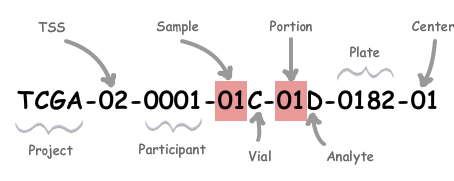

In [ ]:
''' In this section, I am re-generating the labels (type) as denoted in:
    https://docs.gdc.cancer.gov/Encyclopedia/pages/TCGA_Barcode/

    Where as illustrated in the feature and data description, sample_ids with Sample values of 01 are being treated as tumor and 11 as normal


    0 ---> normal
    1 ---> tumor
'''
gene_expr_merged_df['real_type'] = gene_expr_merged_df['sample_id'].apply(lambda x : 1 if x[13:15] == '01' else 0 )

In [ ]:
le = LabelEncoder()
gene_expr_merged_df['type'] = le.fit_transform(gene_expr_merged_df['type'])
gene_expr_merged_df['real_type'] = le.fit_transform(gene_expr_merged_df['real_type'])

In [ ]:
y = gene_expr_merged_df['type']
y_real = gene_expr_merged_df['real_type']
X = gene_expr_merged_df.drop ( ['real_type','type','sample_id'] , axis = 1)

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizing PCA of the incorrect and correct dataset



---

**The old dataset, as illustrated, is mixed up.**

**After creating new dataset based on the correct labels, It is obvious that it is already seperated.**

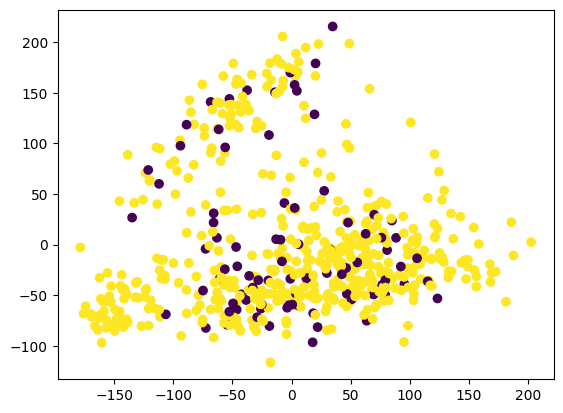

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

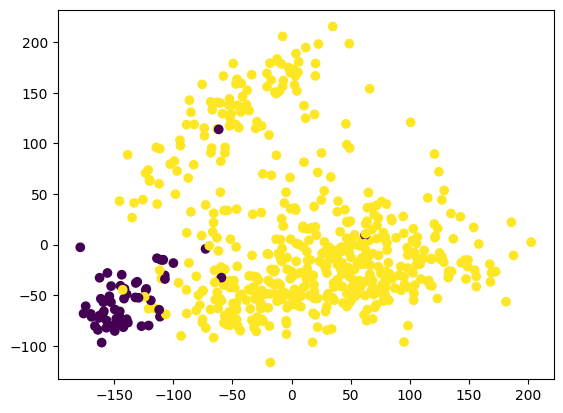

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_real)

# Feature Selection


---



> ## Selecting Top 50 relevant features that are most influential

 data types are numerical - categorical ,
 we can chose `sklearn.feature_selection.f_classif` and `sklearn.feature_selection.SelectKBest`
 for the feature selection techniques.



---


After extracting the top 50 features, I sorted them based on their scores.\
Based on the graphs illustrated below, the scores of features that was extracted from the correct dataset are significantly higher than the one with incorrect labels.








/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 2182  2201  2214  3062  6097  6152  7729  9222 11230 11575 12436 12437
 13000 13217 13755 13876 14821 14839 14916 14930 14932 14944 15529 15658
 15663 16000 16961 17254 17348 17411 17413 17424 17446 17548 17581 17670
 17695 17734 17744 17766 17770 17786 17847 17895 17896 17898 17939 17949
 17951 17960 17961 17967 17968 17974 17977 17993 18005 18006 18014 18016
 18018 18029 18036 18037 18039 18044 18053 18062 18081 18085 18098 18102
 18103 18132 18172 18180 18185 18186 18197 18231 18233 18277 18353 18356
 18372 18394 18441 18501 18502 18529 18567 18572 18574 18685 18696 18756
 18876 18955 18971 19001 19248 19277 19300 19328 19379 19389 19475 19485
 19491 19507 19515 19522 19526 19527 19528 19533 19535 19539 19546 19549] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature

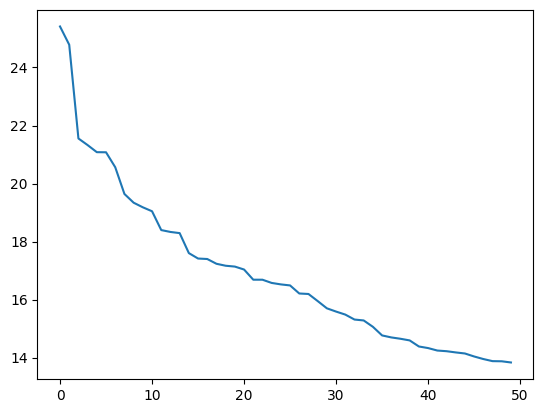

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =1234)

fs = SelectKBest(
    score_func= f_classif,
    k = 50
)

fs.fit(X, y)

top_50_gene = sorted(fs.scores_, reverse = True)[:50]


plt.plot(top_50_gene)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 2182  2201  2214  3062  6097  6152  7729  9222 11230 11575 12436 12437
 13000 13217 13755 13876 14821 14839 14916 14930 14932 14944 15529 15658
 15663 16000 16961 17254 17348 17411 17413 17424 17446 17548 17581 17670
 17695 17734 17744 17766 17770 17786 17847 17895 17896 17898 17939 17949
 17951 17960 17961 17967 17968 17974 17977 17993 18005 18006 18014 18016
 18018 18029 18036 18037 18039 18044 18053 18062 18081 18085 18098 18102
 18103 18132 18172 18180 18185 18186 18197 18231 18233 18277 18353 18356
 18372 18394 18441 18501 18502 18529 18567 18572 18574 18685 18696 18756
 18876 18955 18971 19001 19248 19277 19300 19328 19379 19389 19475 19485
 19491 19507 19515 19522 19526 19527 19528 19533 19535 19539 19546 19549] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature

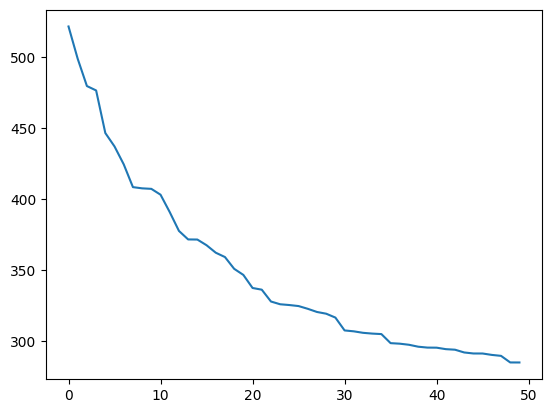

In [ ]:
X_train, X_test, y_train_real, y_test_real = train_test_split(X, y_real, test_size = 0.33, random_state =1234)

fs_real = SelectKBest(
    score_func= f_classif,
    k = 50
)

fs_real.fit(X, y_real)

top_50_gene_real = sorted(fs_real.scores_, reverse = True)[:50]


plt.plot(top_50_gene_real)

In [ ]:
print(
    f" Top features (genes) based on the wron labeling :\n\n{X.columns[fs.get_support()]} \n Top features (gene) based on the real data Label :\n\n{X.columns[fs_real.get_support()]}"
    )

 Top features (genes) based on the wron labeling :

Index(['ATP2C1', 'VCAN', 'PRDM1', 'FNDC3B', 'ZMPSTE24', 'OSGEP', 'MXRA5',
       'CCN4', 'SERPINE1', 'RPL34', 'BIRC2', 'ARSB', 'FN1', 'SLC35D1', 'RGS4',
       'PIGZ', 'INHBA', 'CLTA', 'COL10A1', 'TWSG1', 'NGDN', 'PTGFRN',
       'ALDH1L2', 'UGGT1', 'YME1L1', 'GRHPR', 'HINT2', 'ITGAV', 'CDH11',
       'ADAM12', 'ADAMTS12', 'CCDC107', 'KIF26B', 'FNDC1', 'ZNF219', 'COL3A1',
       'SLC30A1', 'ENC1', 'GXYLT2', 'POGLUT3', 'SNRNP35', 'PDIA2', 'ENTPD7',
       'RING1', 'COL5A2', 'NELFE', 'GPANK1', 'TRIM39', 'C1QTNF9B', 'DDAH2'],
      dtype='object') 
 Top features (gene) based on the real data Label :

Index(['FHL1', 'HSD17B6', 'IBSP', 'PYGM', 'UBE2T', 'PPP1R12B', 'NAALAD2',
       'TNS1', 'PAFAH1B3', 'KIF4A', 'MMP11', 'MYOM1', 'ASF1B', 'CAV2', 'CAV1',
       'SPTBN1', 'LEPR', 'NEK2', 'GPAM', 'KCNIP2', 'ITIH5', 'HJURP', 'COL10A1',
       'PKMYT1', 'AOC3', 'LYVE1', 'RDH5', 'SPRY2', 'MMP13', 'NUSAP1', 'FAM13A',
       'NUF2', 'TPM3', 'GSN', 

In [ ]:

top_col_name_real = ['FHL1', 'HSD17B6', 'IBSP', 'PYGM', 'UBE2T', 'PPP1R12B', 'NAALAD2',
       'TNS1', 'PAFAH1B3', 'KIF4A', 'MMP11', 'MYOM1', 'ASF1B', 'CAV2', 'CAV1',
       'SPTBN1', 'LEPR', 'NEK2', 'GPAM', 'KCNIP2', 'ITIH5', 'HJURP', 'COL10A1',
       'PKMYT1', 'AOC3', 'LYVE1', 'RDH5', 'SPRY2', 'MMP13', 'NUSAP1', 'FAM13A',
       'NUF2', 'TPM3', 'GSN', 'PAMR1', 'SPC25', 'ADAMTS5', 'CDC25C', 'PLPP3',
       'BTNL9', 'PCLAF', 'PBK', 'TNXB', 'CAVIN2', 'NPR1', 'SIK2', 'IQGAP3',
       'PDE2A', 'PLPP4', 'UHRF1','real_type']



top_col_name = ['ATP2C1', 'VCAN', 'PRDM1', 'FNDC3B', 'ZMPSTE24', 'OSGEP', 'MXRA5',
       'CCN4', 'SERPINE1', 'RPL34', 'BIRC2', 'ARSB', 'FN1', 'SLC35D1', 'RGS4',
       'PIGZ', 'INHBA', 'CLTA', 'COL10A1', 'TWSG1', 'NGDN', 'PTGFRN',
       'ALDH1L2', 'UGGT1', 'YME1L1', 'GRHPR', 'HINT2', 'ITGAV', 'CDH11',
       'ADAM12', 'ADAMTS12', 'CCDC107', 'KIF26B', 'FNDC1', 'ZNF219', 'COL3A1',
       'SLC30A1', 'ENC1', 'GXYLT2', 'POGLUT3', 'SNRNP35', 'PDIA2', 'ENTPD7',
       'RING1', 'COL5A2', 'NELFE', 'GPANK1', 'TRIM39', 'C1QTNF9B', 'DDAH2','type']

In [ ]:
top_gene_real = gene_expr_merged_df[top_col_name_real]
top_gene = gene_expr_merged_df[top_col_name]

In [ ]:
for col in top_gene_real.columns:
  if col != 'real_type' :
    top_gene_real[col] = top_gene_real[col].astype(float)


for col in top_gene.columns:
  if col != 'type' :
    top_gene[col] = top_gene[col].astype(float)

<ipython-input-20-508305f06f93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_gene_real[col] = top_gene_real[col].astype(float)
<ipython-input-20-508305f06f93>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_gene[col] = top_gene[col].astype(float)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-b6ae8908a20c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_gene_real['cluster'] = clustering_real.labels_
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


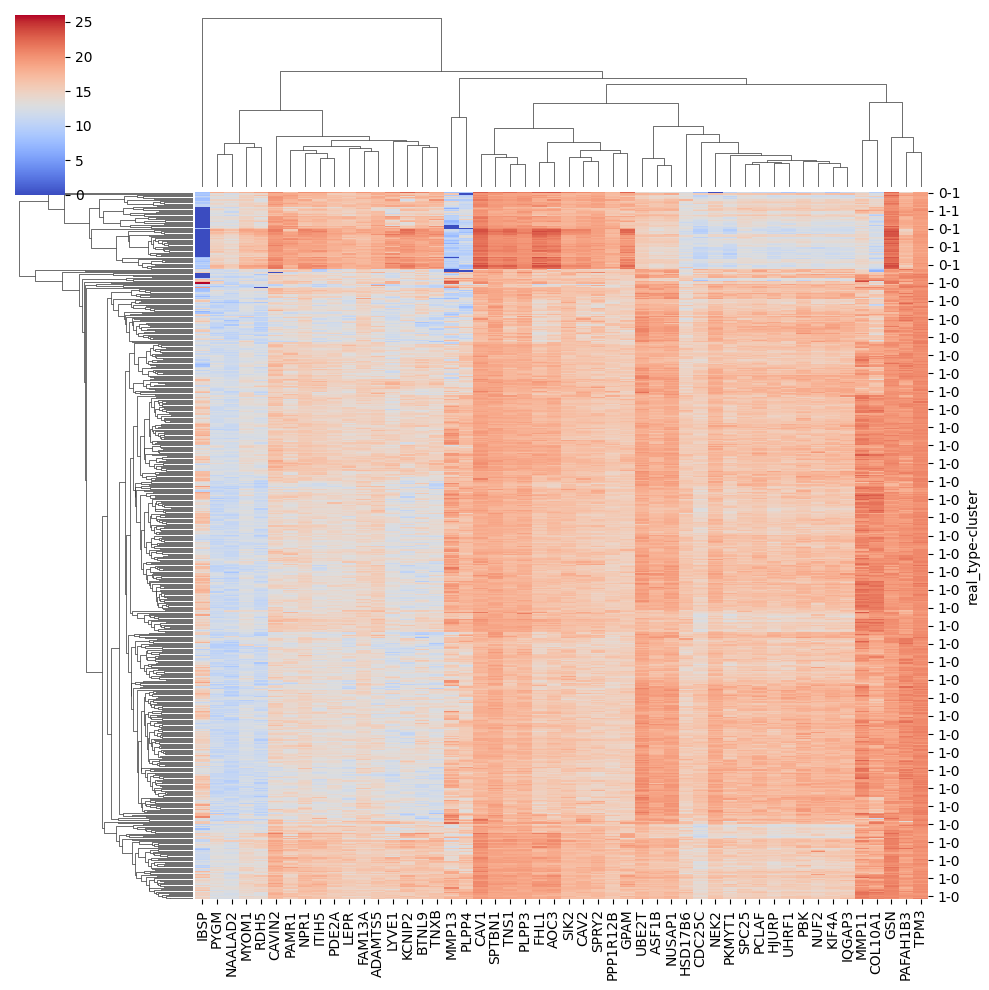

In [ ]:

x_top_gene_real = top_gene_real.drop(['real_type'], axis = 1)
km_model_real = KMeans(n_clusters=2)
clustering_real = km_model_real.fit(x_top_gene_real)

top_gene_real['cluster'] = clustering_real.labels_


sns.clustermap(top_gene_real.set_index(['real_type', 'cluster']), cmap='coolwarm', xticklabels=True)

plt.show()

In [ ]:
top_gene_real

,FHL1,HSD17B6,IBSP,PYGM,UBE2T,PPP1R12B,NAALAD2,TNS1,PAFAH1B3,KIF4A,...,TNXB,CAVIN2,NPR1,SIK2,IQGAP3,PDE2A,PLPP4,UHRF1,real_type,cluster
0,13.645369,15.350424,16.342782,12.106035,19.052793,15.311832,10.798642,15.328805,20.974464,16.807071,...,13.294037,11.813918,14.088785,15.894260,16.750189,12.373209,15.306146,17.330169,1,0
1,15.719280,16.268756,16.652673,10.520436,18.258486,15.579218,10.171009,17.196746,20.197632,15.774390,...,12.306393,13.914969,13.688843,16.508671,15.340135,13.528566,17.596694,15.269026,1,0
2,15.877812,15.432058,14.980438,11.375503,20.861070,15.287931,11.960736,15.834608,19.145023,18.382211,...,9.557786,15.013649,13.040151,16.329958,17.922696,12.359184,14.123033,17.656158,1,0
3,21.982133,12.468637,9.954870,15.189183,14.883467,17.592069,14.905124,20.755151,17.021950,11.634604,...,17.594073,20.275545,18.964452,19.159976,10.865177,18.277896,10.594961,11.678656,0,1
4,22.523885,12.461931,0.000000,15.162855,15.295902,17.584178,14.528004,21.059992,17.203783,11.890858,...,18.717393,19.944696,19.383234,19.209206,12.030310,18.394141,9.267736,11.323672,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,16.418190,16.197885,11.818782,12.597847,18.699063,15.637233,11.749030,17.362602,20.352688,15.948855,...,14.799053,16.138035,14.372125,15.634301,16.748404,14.328926,17.225719,16.278238,1,0
584,16.036935,15.993660,15.962347,9.894237,20.311923,15.719691,10.351483,17.305393,19.842258,18.530071,...,13.066846,13.192821,14.725134,16.130928,18.078880,13.686807,16.624090,17.075553,1,0
585,15.751927,15.771037,17.381530,11.681539,17.578456,15.146545,10.800765,17.454736,20.309868,16.237880,...,13.220532,14.738216,14.888769,16.433279,15.289805,14.458268,16.414843,15.467874,1,0
586,17.710835,14.499927,8.387177,13.202914,18.459711,15.786745,11.240684,18.142803,21.446841,16.385541,...,15.462632,17.858509,16.085234,16.268049,17.052652,15.692564,16.399496,16.656673,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-8195293506a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_gene['cluster'] = clustering.labels_
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


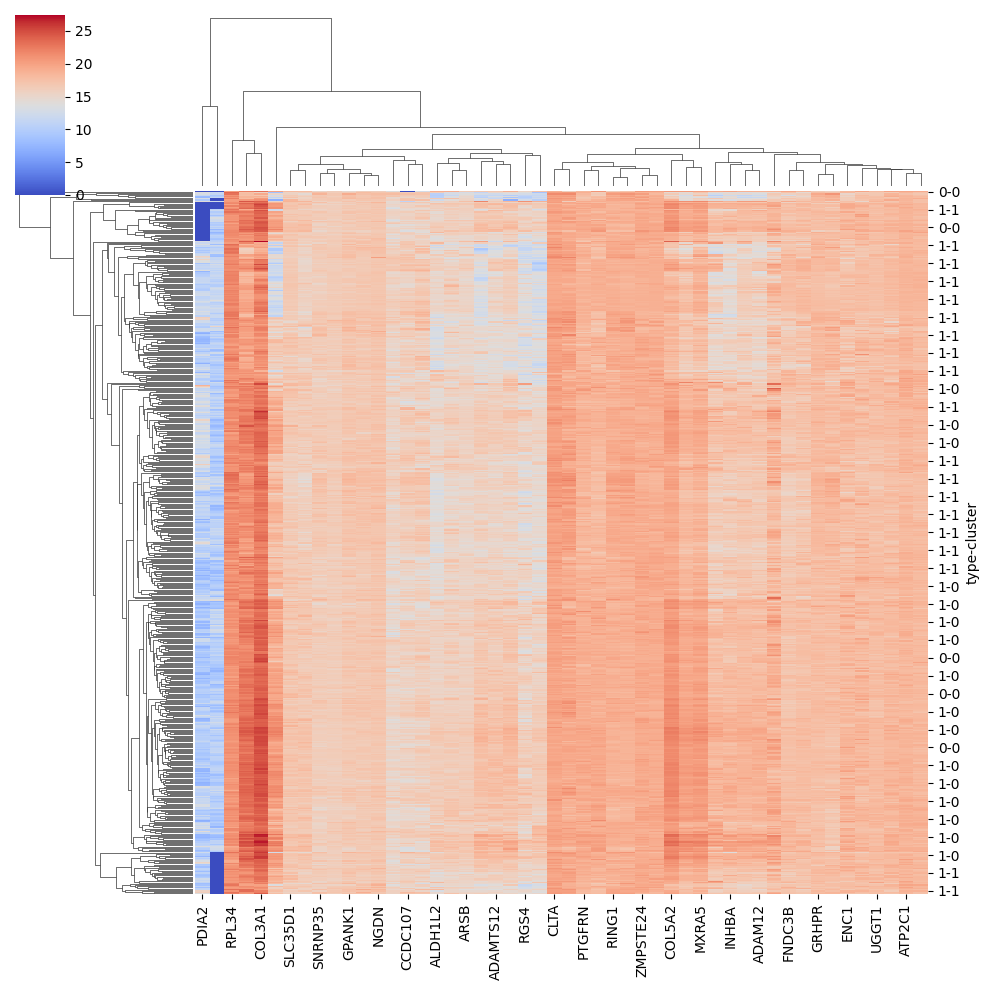

In [ ]:
x_top_gene = top_gene.drop(['type'], axis = 1)
km_model = KMeans(n_clusters=2)
clustering = km_model.fit(x_top_gene)

top_gene['cluster'] = clustering.labels_


# Create the heatmap
sns.clustermap(top_gene.set_index(['type', 'cluster']), cmap='coolwarm')

# Show the heatmap
plt.show()

# Saving the top 100 features

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 2182  2201  2214  3062  6097  6152  7729  9222 11230 11575 12436 12437
 13000 13217 13755 13876 14821 14839 14916 14930 14932 14944 15529 15658
 15663 16000 16961 17254 17348 17411 17413 17424 17446 17548 17581 17670
 17695 17734 17744 17766 17770 17786 17847 17895 17896 17898 17939 17949
 17951 17960 17961 17967 17968 17974 17977 17993 18005 18006 18014 18016
 18018 18029 18036 18037 18039 18044 18053 18062 18081 18085 18098 18102
 18103 18132 18172 18180 18185 18186 18197 18231 18233 18277 18353 18356
 18372 18394 18441 18501 18502 18529 18567 18572 18574 18685 18696 18756
 18876 18955 18971 19001 19248 19277 19300 19328 19379 19389 19475 19485
 19491 19507 19515 19522 19526 19527 19528 19533 19535 19539 19546 19549] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature

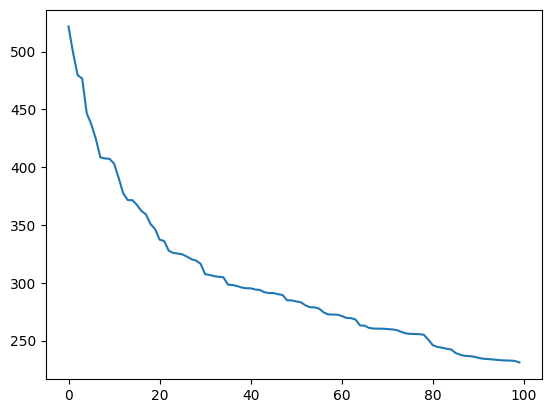

In [ ]:
fs_real = SelectKBest(
    score_func= f_classif,
    k = 100
)

fs_real.fit(X, y_real)

top_50_gene_real = sorted(fs_real.scores_, reverse = True)[:100]


plt.plot(top_50_gene_real)

In [ ]:
print(
    f"Top 100 features (gene) based on the real data Label :\n\n{X.columns[fs_real.get_support()]}"
    )

Top 100 features (gene) based on the real data Label :

Index(['CEP68', 'FHL1', 'HSD17B6', 'IBSP', 'PYGM', 'HMMR', 'WDR62', 'ACACB',
       'UBE2T', 'PPP1R12B', 'NAALAD2', 'TNS1', 'LIPE', 'PAFAH1B3', 'TPX2',
       'BIRC5', 'KIF4A', 'PALMD', 'MMP11', 'CDKN3', 'MYOM1', 'ASF1B', 'CAV2',
       'CAV1', 'NEIL3', 'SH3D19', 'KIF20A', 'SPTBN1', 'LEPR', 'NEK2', 'CENPF',
       'KLHL29', 'GPAM', 'KCNIP2', 'CAT', 'ZWINT', 'ITIH5', 'HJURP', 'COL10A1',
       'CKS2', 'DLGAP5', 'PKMYT1', 'AOC3', 'LYVE1', 'BICDL1', 'ITGA7', 'RDH5',
       'TROAP', 'SPRY2', 'ARHGAP20', 'MMP13', 'NUSAP1', 'ADAMTS14', 'FAM13A',
       'NUF2', 'DTL', 'TPM3', 'GSN', 'PAMR1', 'SPC25', 'ABCA10', 'ADAMTS5',
       'SLC24A2', 'CDC25C', 'SPC24', 'TEDC2', 'PLPP3', 'CLEC3B', 'EBF1',
       'GPR146', 'VEGFD', 'CFL2', 'BTNL9', 'PCLAF', 'IGFBP6', 'TK1', 'PBK',
       'TNXB', 'CAVIN2', 'ATOH8', 'NPR1', 'CKAP2L', 'BUB1', 'SIK2', 'CDK1',
       'RRM2', 'HSPB7', 'UBE2C', 'LPL', 'OXTR', 'SLC2A4', 'PYCR1', 'IQGAP3',
       'KIF18B', 'PD

In [ ]:

top_100_col_name_real = ['CEP68', 'FHL1', 'HSD17B6', 'IBSP', 'PYGM', 'HMMR', 'WDR62', 'ACACB',
       'UBE2T', 'PPP1R12B', 'NAALAD2', 'TNS1', 'LIPE', 'PAFAH1B3', 'TPX2',
       'BIRC5', 'KIF4A', 'PALMD', 'MMP11', 'CDKN3', 'MYOM1', 'ASF1B', 'CAV2',
       'CAV1', 'NEIL3', 'SH3D19', 'KIF20A', 'SPTBN1', 'LEPR', 'NEK2', 'CENPF',
       'KLHL29', 'GPAM', 'KCNIP2', 'CAT', 'ZWINT', 'ITIH5', 'HJURP', 'COL10A1',
       'CKS2', 'DLGAP5', 'PKMYT1', 'AOC3', 'LYVE1', 'BICDL1', 'ITGA7', 'RDH5',
       'TROAP', 'SPRY2', 'ARHGAP20', 'MMP13', 'NUSAP1', 'ADAMTS14', 'FAM13A',
       'NUF2', 'DTL', 'TPM3', 'GSN', 'PAMR1', 'SPC25', 'ABCA10', 'ADAMTS5',
       'SLC24A2', 'CDC25C', 'SPC24', 'TEDC2', 'PLPP3', 'CLEC3B', 'EBF1',
       'GPR146', 'VEGFD', 'CFL2', 'BTNL9', 'PCLAF', 'IGFBP6', 'TK1', 'PBK',
       'TNXB', 'CAVIN2', 'ATOH8', 'NPR1', 'CKAP2L', 'BUB1', 'SIK2', 'CDK1',
       'RRM2', 'HSPB7', 'UBE2C', 'LPL', 'OXTR', 'SLC2A4', 'PYCR1', 'IQGAP3',
       'KIF18B', 'PDE2A', 'TMEM220', 'DMD', 'PLPP4', 'TRIM59', 'UHRF1']

In [ ]:
top_100 = pd.DataFrame(top_100_col_name_real, columns=['top 100 selected features'])
top_100.to_csv('feature_result_Amirhosein Ebrahimi.csv', index=False)

# Problem - 2

In [ ]:
'''
File Name : train label
File Link : https://drive.google.com/file/d/1eYEys1YxgFfXUCtpEb1zDTfSFwabQn5J/view?usp=drive_link
File Id : '1eYEys1YxgFfXUCtpEb1zDTfSFwabQn5J'

'''
!gdown --id 1eYEys1YxgFfXUCtpEb1zDTfSFwabQn5J




'''
File Name : train data
File Link : https://drive.google.com/file/d/1_nOCD9NHnOzz1R2kpuWEiHRygJm2ja7A/view?usp=sharing
File Id : '1_nOCD9NHnOzz1R2kpuWEiHRygJm2ja7A'

'''
!gdown --id 1_nOCD9NHnOzz1R2kpuWEiHRygJm2ja7A



'''
File Name : test data
File Link : https://drive.google.com/file/d/1tP14EgT_CMRGAmr2wW76tDYWe0yLBNFy/view?usp=sharing
id = '1tP14EgT_CMRGAmr2wW76tDYWe0yLBNFy'
'''
!gdown --id 1tP14EgT_CMRGAmr2wW76tDYWe0yLBNFy

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eYEys1YxgFfXUCtpEb1zDTfSFwabQn5J
To: /content/train_label.tsv
100% 77.4k/77.4k [00:00<00:00, 112MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_nOCD9NHnOzz1R2kpuWEiHRygJm2ja7A
To: /content/train_data.tsv
100% 145M/145M [00:01<00:00, 115MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com

# Import required libraries

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

In [ ]:
def prepare_data(Data , Type):

  Data_gene = Data["Unnamed: 0"]
  Data = Data.drop("Unnamed: 0",axis = 1)
  Data = Data.transpose()

  Data.columns = Data_gene

  Data['sample_id'] = Data.index
  Data = Data.reset_index()
  Data = Data.drop(['index'], axis =1 )

  if Type == 'test':
    Data = Data.drop('sample_id', axis=1)

  return Data

# Reading the data

In [ ]:
X_train = pd.read_csv("train_data.tsv", delimiter="\t")
y_train = pd.read_csv("train_label.tsv", delimiter="\t")
X_test = pd.read_csv("test_data.tsv", delimiter="\t")

In [ ]:
X_test_id = pd.read_csv("test_data.tsv", delimiter="\t")
X_test_id = prepare_data(X_test_id, Type = 'train')

In [ ]:
X_train = prepare_data(X_train, Type = 'train')
X_test = prepare_data(X_test, Type = 'test')

In [ ]:
y_train = y_train.drop(
    ['Unnamed: 0'],
    axis = 1
)
y_train = y_train.rename(columns={"id": "sample_id"})

# Checking out the number of classes in the dataset

In [ ]:
y_train['X_primary_disease'].unique()

array(['breast invasive carcinoma', 'kidney clear cell carcinoma',
       'lung adenocarcinoma'], dtype=object)

In [ ]:
labels = {
    "breast invasive carcinoma": 0,
    "kidney clear cell carcinoma": 1 ,
    "lung adenocarcinoma" : 2
}

y_train['X_primary_disease'] = y_train['X_primary_disease'].map(labels)
Train_data = pd.merge(y_train, X_train,  on="sample_id", how='inner')
Train_data

,sample_id,X_primary_disease,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,S1186,0,5.95,0.00,12.67,10.51,6.08,1.36,8.94,9.10,...,9.31,9.96,5.25,8.17,9.44,7.35,9.44,11.56,10.37,10.20
1,S1187,0,5.54,0.45,13.09,1.07,7.56,1.30,8.87,9.69,...,8.96,10.21,5.83,9.10,10.39,6.54,9.18,11.64,9.22,8.84
2,S1188,0,6.76,0.00,14.00,1.11,8.34,1.55,9.20,9.94,...,8.52,8.84,6.94,9.98,10.36,2.03,9.37,11.51,11.06,11.17
3,S1189,0,9.39,0.00,12.97,0.00,6.47,0.00,9.97,10.20,...,9.78,8.92,5.13,8.40,10.35,5.70,9.53,11.29,9.55,9.25
4,S1190,0,7.18,0.00,17.84,1.67,6.75,2.60,8.50,9.54,...,8.73,9.72,6.13,9.11,10.76,6.20,10.13,13.38,9.50,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,S995,0,6.36,0.00,13.13,1.38,8.30,0.62,9.48,10.13,...,8.78,9.14,6.44,9.37,10.36,6.44,10.14,10.97,10.68,10.66
1841,S996,1,4.70,7.55,15.14,0.40,10.54,1.19,9.11,9.33,...,7.26,7.95,6.72,8.93,10.31,4.11,9.91,11.75,10.26,9.63
1842,S997,0,6.81,0.00,14.85,4.85,8.05,1.06,9.01,9.62,...,8.69,8.39,6.60,9.14,10.45,5.69,10.13,12.08,10.97,10.17
1843,S998,1,4.11,8.73,14.45,0.00,10.92,3.94,9.33,9.01,...,6.61,6.57,7.12,8.63,9.93,7.03,10.17,11.68,8.92,9.52


# Analyzing the whole data

In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 0 to 1844
Columns: 16342 entries, sample_id to ZZZ3
dtypes: float64(16340), int64(1), object(1)
memory usage: 230.0+ MB


In [ ]:
Train_data.describe()

,X_primary_disease,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.00000,1845.000000,1845.000000,...,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000
mean,0.684553,6.600575,1.638201,13.949485,2.357848,8.619068,1.400883,9.40684,9.670472,1.733539,...,8.312309,8.924558,5.918352,8.785669,10.054688,5.137875,9.791675,11.784759,10.121398,9.608596
std,0.816190,1.407439,2.880483,1.175042,2.979664,1.381319,1.499101,0.42937,0.752613,2.236228,...,0.845253,1.174160,0.746795,0.683991,0.389775,2.185391,0.515488,0.681482,0.592274,0.568903
min,0.000000,1.280000,0.000000,9.380000,0.000000,4.590000,0.000000,6.34000,7.300000,0.000000,...,6.070000,5.180000,2.690000,5.130000,8.160000,0.000000,7.850000,7.300000,7.040000,7.250000
25%,0.000000,5.580000,0.000000,13.120000,0.370000,7.660000,0.340000,9.13000,9.150000,0.000000,...,7.640000,8.020000,5.460000,8.350000,9.840000,3.790000,9.480000,11.380000,9.790000,9.270000
50%,0.000000,6.700000,0.000000,13.900000,1.190000,8.610000,0.940000,9.39000,9.690000,0.820000,...,8.390000,9.010000,5.970000,8.780000,10.080000,5.540000,9.790000,11.800000,10.160000,9.580000
75%,1.000000,7.580000,1.100000,14.820000,2.990000,9.780000,2.010000,9.67000,10.150000,2.700000,...,8.890000,9.810000,6.450000,9.180000,10.310000,6.820000,10.140000,12.240000,10.520000,9.950000
max,2.000000,13.110000,9.960000,17.920000,14.810000,12.050000,11.620000,11.07000,13.360000,11.860000,...,11.610000,12.780000,7.940000,11.650000,11.560000,9.820000,11.920000,14.550000,12.660000,13.000000


# Visualization

## Checking the distributions of the classes

In [ ]:
fig = px.histogram(Train_data ,  x = 'X_primary_disease', color = 'X_primary_disease')
newnames = {'0':'breast invasive', '1': 'kidney clear cell' , '2' : 'lung adenocarcinoma'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                          legendgroup = newnames[t.name],
                          hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                   ))

fig.show()

# Applying PCA and visualize it

In [ ]:
pca = PCA(n_components = 3)
y_train = Train_data['X_primary_disease']

X_train = Train_data.drop(
    ['sample_id' ,	'X_primary_disease'],
    axis = 1
)
X_pca = pca.fit_transform(X_train)

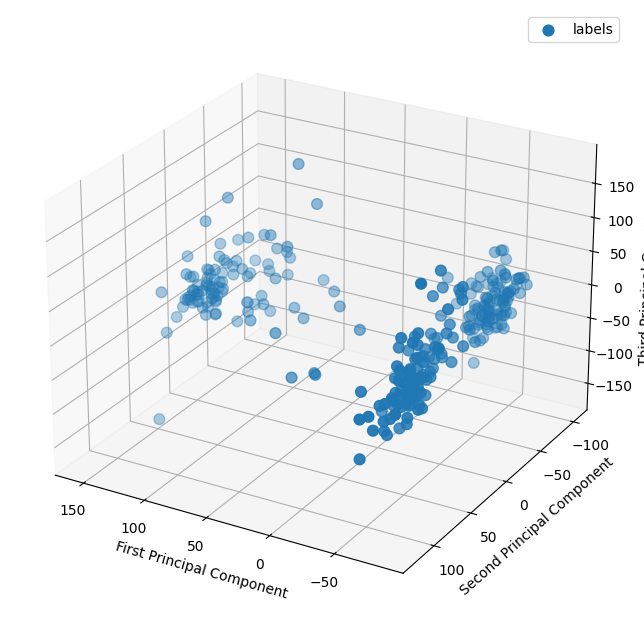

In [ ]:
X_pca_t = pca.fit_transform(X_test)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

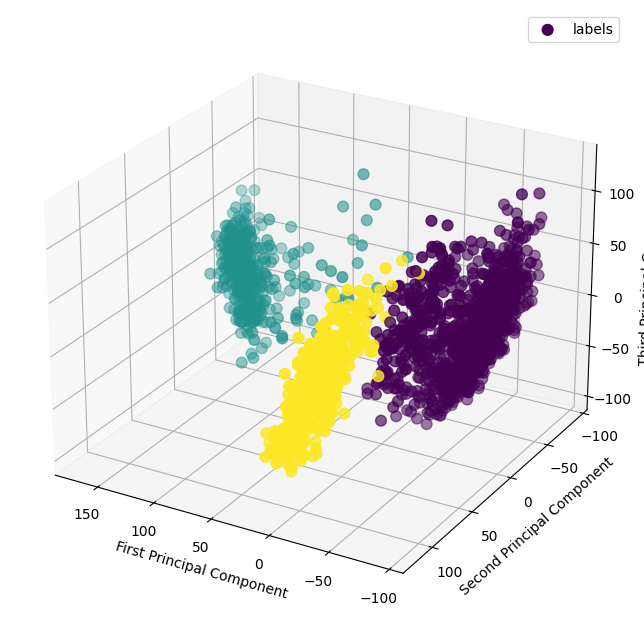

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_train, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

In [ ]:
fig = px.scatter_3d( X_pca, x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2],
                    color=y_train)
fig.show()

In [ ]:
fig = px.scatter_3d( X_pca_t, x=X_pca_t[:,0], y=X_pca_t[:,1], z=X_pca_t[:,2])
fig.show()

# Applying feature selection before training phase

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest



fs = SelectKBest(
    score_func= f_classif,
    k = 80
)

fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 3377  3529  3938  7206 10345 10910 10911 10913 14813] are constant.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



# Machine learning models



1.   Logistic Regression
2.   AdaBoost
3.   Decision Trees
4.   Random Forest
5.   Support Vector Machines (SVMs)
6.   Naive Bayes
7.   K-means Clustering

In [ ]:
from sklearn.model_selection import cross_val_score , KFold
def train_and_evaluate(Model, Model_name, X_train, y_train, X_test):
  print(f"------------------{Model_name}------------------")

  ckf = KFold(n_splits = 5)
  scores = cross_val_score(Model, X_train, y_train, cv=ckf)
  print("Mean cross-validation score:", np.mean(scores))
  Model.fit(X_train, y_train)
  print("Accuracy of Training:",Model.score(X_train,y_train) )
  y_pred = Model.predict(X_test)
  return y_pred

# **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression(max_iter=500)

y_pred_LR = train_and_evaluate(
    Model_lr,
    Model_name = "LogisticRegression",
    X_train = X_train ,
    y_train = y_train,
    X_test = X_test)

------------------LogisticRegression------------------
Mean cross-validation score: 0.9978319783197833
Accuracy of Training: 1.0


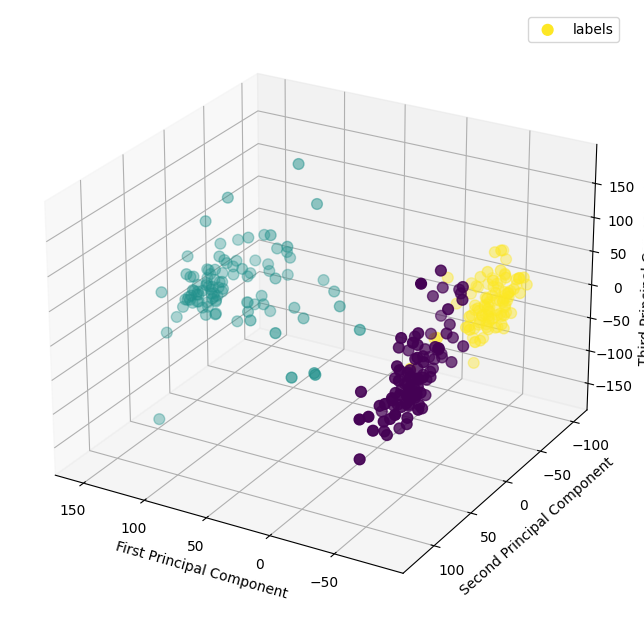

In [ ]:
X_pca_t = pca.fit_transform(X_test)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_LR, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

In [ ]:
y_pred_LR_fs = train_and_evaluate(
    Model_lr,
    Model_name = "LogisticRegression - feature selection",
    X_train = X_train_fs ,
    y_train = y_train,
    X_test = X_test_fs)

------------------LogisticRegression - feature selection------------------
Mean cross-validation score: 0.9978319783197833
Accuracy of Training: 1.0


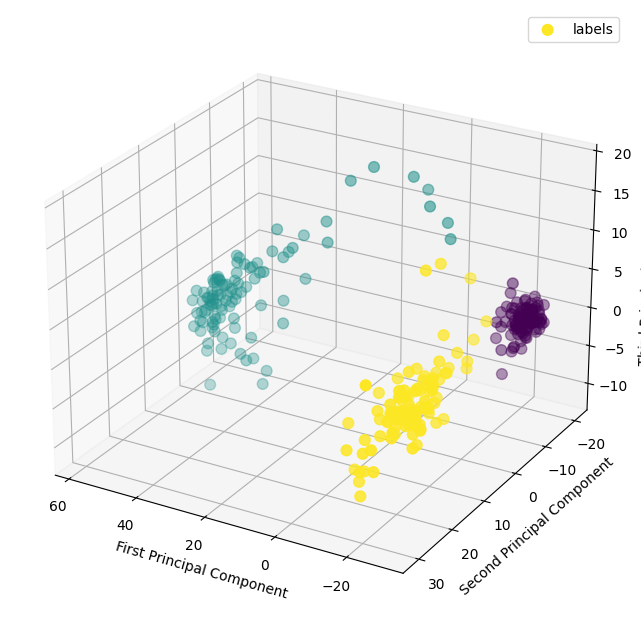

In [ ]:
X_pca_t = pca.fit_transform(X_test_fs)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_LR_fs, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Model_AB = AdaBoostClassifier()

y_pred_AB = train_and_evaluate(
    Model_AB,
    Model_name = "AdaBoostClassifier",
    X_train = X_train ,
    y_train = y_train,
    X_test = X_test)

------------------AdaBoostClassifier------------------
Mean cross-validation score: 0.9447154471544715
Accuracy of Training: 1.0


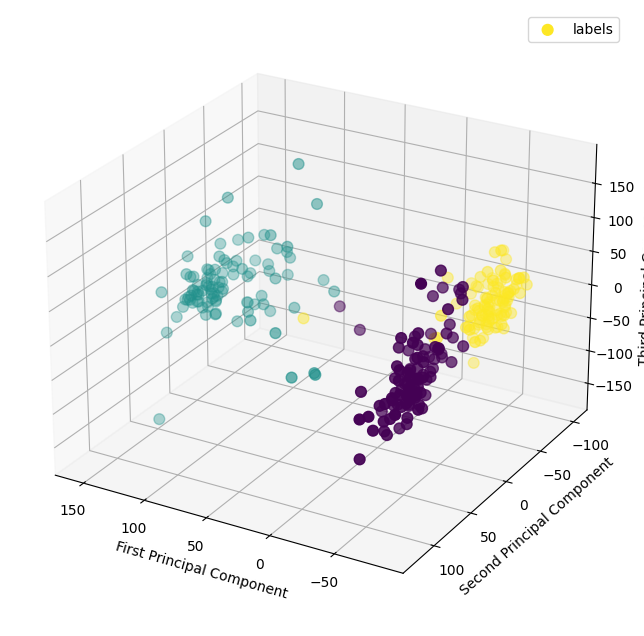

In [ ]:
X_pca_t = pca.fit_transform(X_test)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_AB, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

In [ ]:
y_pred_AB_fs = train_and_evaluate(
    Model_AB,
    Model_name = "AdaBoost - feature selection",
    X_train = X_train_fs ,
    y_train = y_train,
    X_test = X_test_fs)

------------------AdaBoost - feature selection------------------
Mean cross-validation score: 0.9799457994579948
Accuracy of Training: 1.0


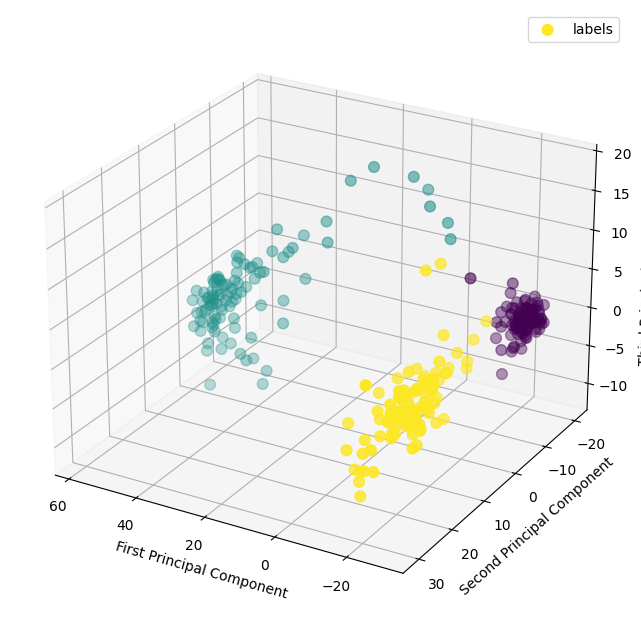

In [ ]:
X_pca_t = pca.fit_transform(X_test_fs)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_AB_fs, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(max_depth = 2)

y_pred_rf = train_and_evaluate(
    Model_rf,
    Model_name = "RandomForestClassifier",
    X_train = X_train ,
    y_train = y_train,
    X_test = X_test)

------------------RandomForestClassifier------------------
Mean cross-validation score: 0.9869918699186991
Accuracy of Training: 0.9880758807588076


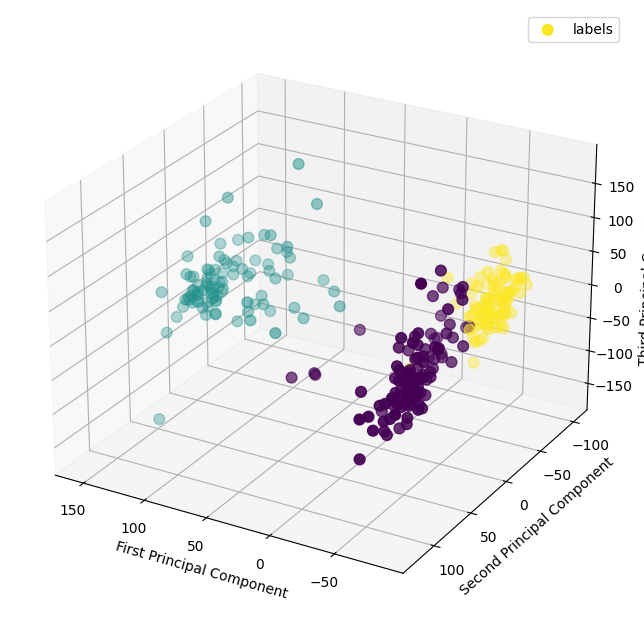

In [ ]:
X_pca_t = pca.fit_transform(X_test)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_rf, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

In [ ]:
y_pred_rf_fs = train_and_evaluate(
    Model_rf,
    Model_name = "RandomForestClassifier - feature selection",
    X_train = X_train_fs ,
    y_train = y_train,
    X_test = X_test_fs)

------------------RandomForestClassifier - feature selection------------------
Mean cross-validation score: 0.9956639566395664
Accuracy of Training: 0.9962059620596206


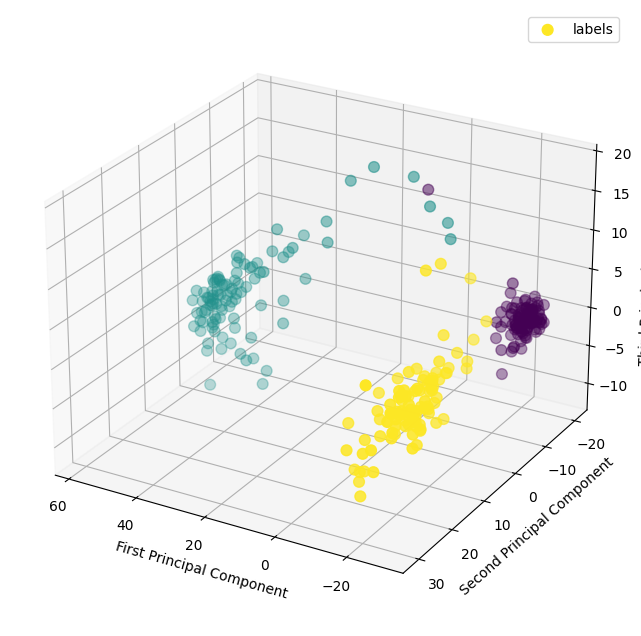

In [ ]:
X_pca_t = pca.fit_transform(X_test_fs)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_rf_fs, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

# **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier()

y_pred_dt = train_and_evaluate(
    Model_dt,
    Model_name = "DecisionTreeClassifier",
    X_train = X_train ,
    y_train = y_train,
    X_test = X_test)

------------------DecisionTreeClassifier------------------
Mean cross-validation score: 0.9815718157181571
Accuracy of Training: 1.0


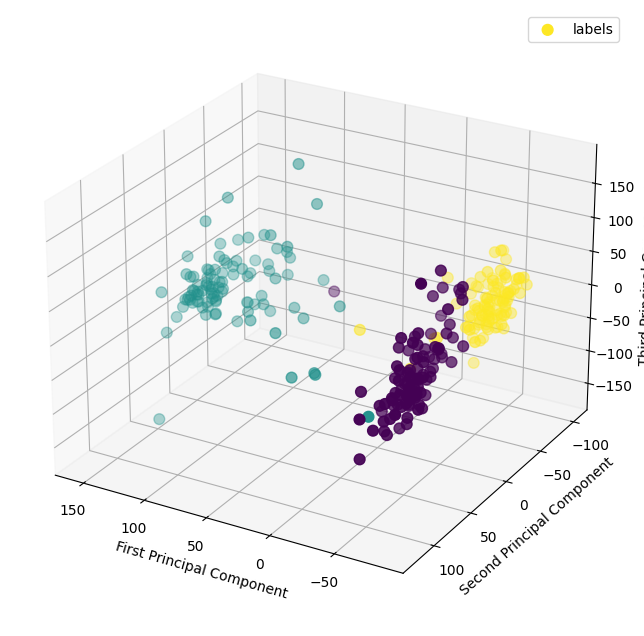

In [ ]:
X_pca_t = pca.fit_transform(X_test)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_dt, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

In [ ]:
y_pred_dt_fs = train_and_evaluate(
    Model_dt,
    Model_name = "DecisionTreeClassifier - feature selection",
    X_train = X_train_fs ,
    y_train = y_train,
    X_test = X_test_fs)

------------------DecisionTreeClassifier - feature selection------------------
Mean cross-validation score: 0.9886178861788618
Accuracy of Training: 1.0


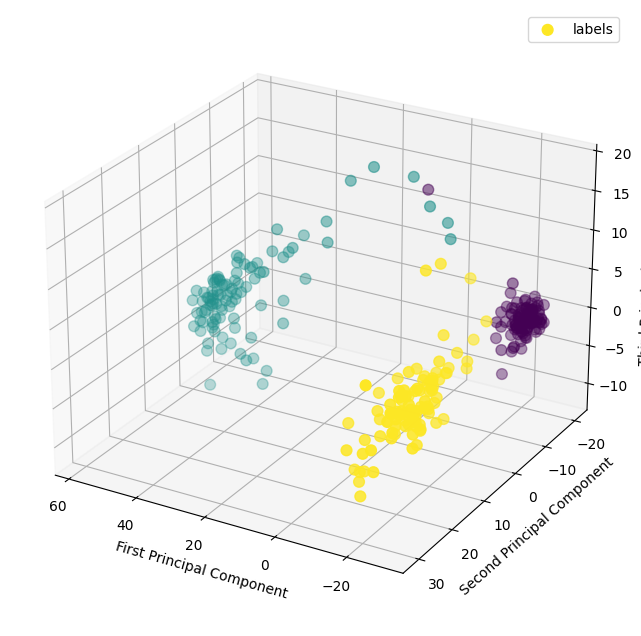

In [ ]:
X_pca_t = pca.fit_transform(X_test_fs)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_dt_fs, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

# **Support Vector Machines (SVMs)**

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()

y_pred_svc = train_and_evaluate(
    model_svc,
    Model_name = "SVC",
    X_train = X_train ,
    y_train = y_train,
    X_test = X_test)

------------------SVC------------------
Mean cross-validation score: 0.9962059620596205
Accuracy of Training: 0.9994579945799458


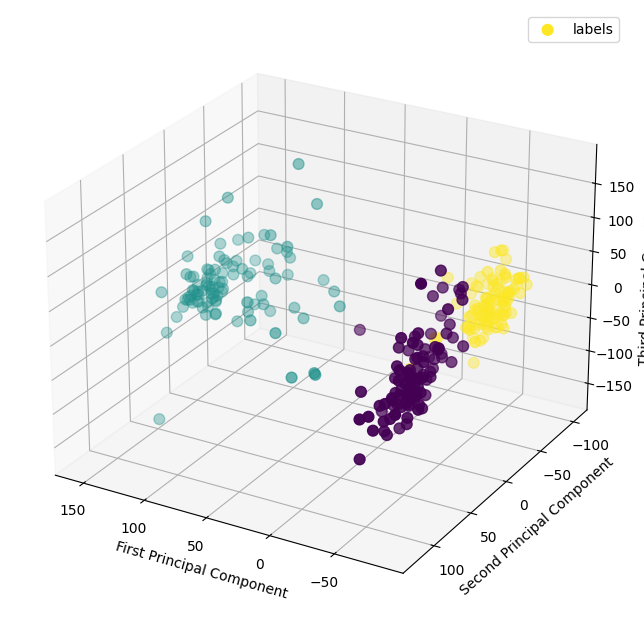

In [ ]:
X_pca_t = pca.fit_transform(X_test)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_svc, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

In [ ]:
y_pred_svc_fs = train_and_evaluate(
    model_svc,
    Model_name = "SVC - feature selection",
    X_train = X_train_fs ,
    y_train = y_train,
    X_test = X_test_fs)

------------------SVC - feature selection------------------
Mean cross-validation score: 0.9962059620596205
Accuracy of Training: 0.9967479674796748


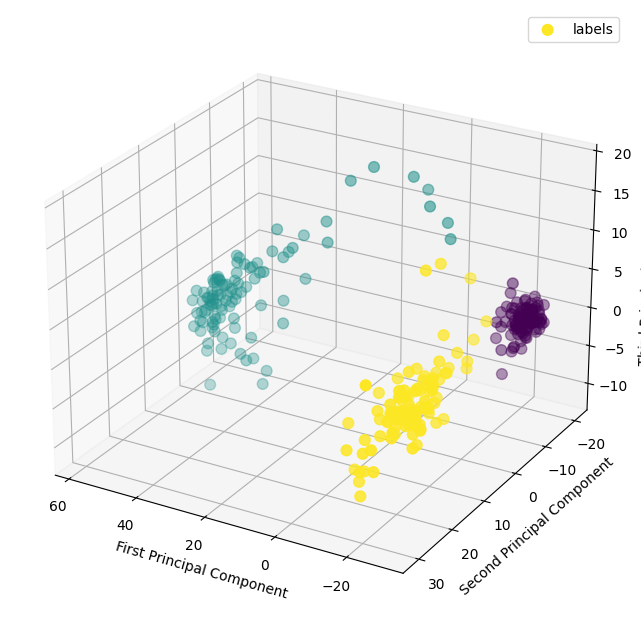

In [ ]:
X_pca_t = pca.fit_transform(X_test_fs)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_svc_fs, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()

y_pred_GNB = train_and_evaluate(
    model_GNB,
    Model_name = "Gaussian Naive Bayes",
    X_train = X_train ,
    y_train = y_train,
    X_test = X_test)

------------------Gaussian Naive Bayes------------------
Mean cross-validation score: 0.9474254742547427
Accuracy of Training: 0.997289972899729


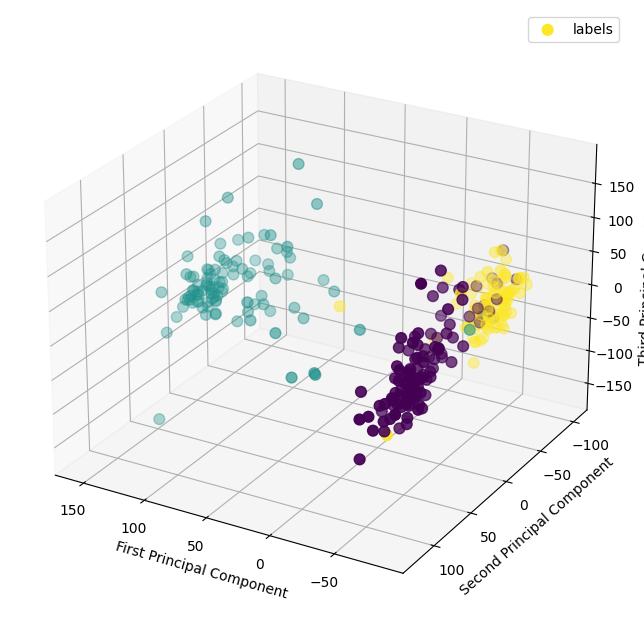

In [ ]:
X_pca_t = pca.fit_transform(X_test)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_GNB, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

In [ ]:
y_pred_GNB_fs = train_and_evaluate(
    model_GNB,
    Model_name = "Gaussian Naive Bayes - feature selection",
    X_train = X_train_fs ,
    y_train = y_train,
    X_test = X_test_fs)

------------------Gaussian Naive Bayes - feature selection------------------
Mean cross-validation score: 0.9913279132791329
Accuracy of Training: 0.9929539295392954


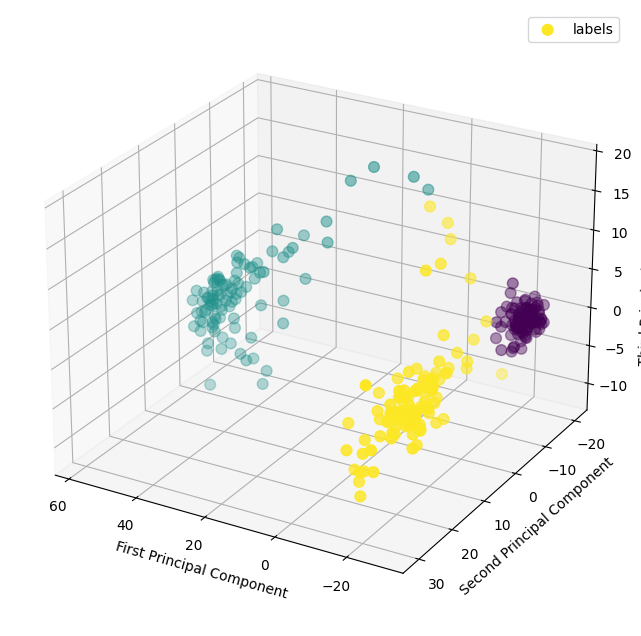

In [ ]:
X_pca_t = pca.fit_transform(X_test_fs)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_GNB_fs, s=60)
ax.legend(['labels'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

# K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
def clustering(Model, X_train, X_test):
  Model.fit(X_train)
  y_pred = Model.predict(X_test)
  score = silhouette_score(X_test, y_pred)
  print("Silhouette score:", score)
  return y_pred

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
y_pred_km = clustering(kmeans, X_train, X_test)
y_pred_km_fs = clustering(kmeans, X_train_fs, X_test_fs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score: 0.20725477780835092


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score: 0.5850211155447641


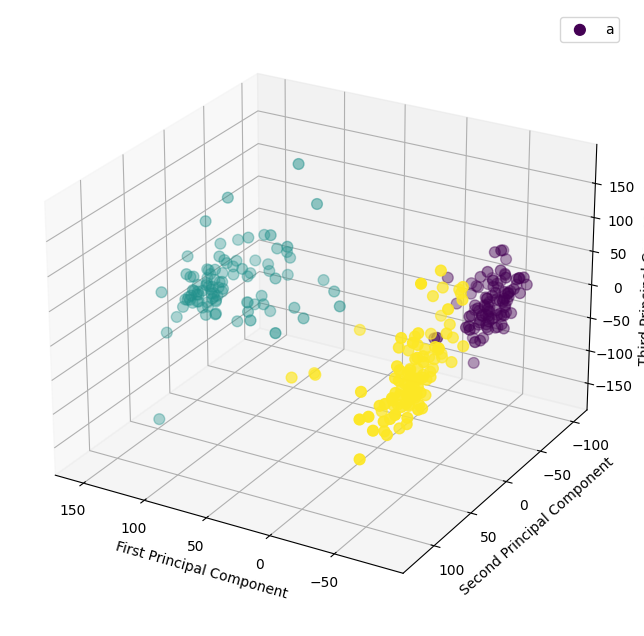

In [ ]:
X_pca_t = pca.fit_transform(X_test)

from plotly.express import px

fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_km, s=60)


ax.legend(['a'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

In [ ]:
fig = px.scatter_3d( X_pca_t, x=X_pca_t[:,0], y=X_pca_t[:,1], z=X_pca_t[:,2] , color = y_pred_km)
fig.show()

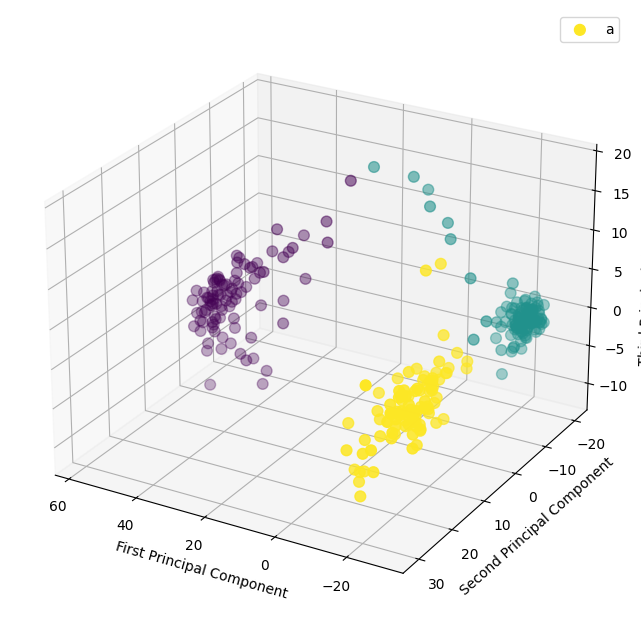

In [ ]:
X_pca_t = pca.fit_transform(X_test_fs)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_t[:,0], X_pca_t[:,1], X_pca_t[:,2], c = y_pred_km_fs, s=60)
ax.legend(['a'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(25, 120)

In [ ]:
fig = px.scatter_3d( X_pca_t, x=X_pca_t[:,0], y=X_pca_t[:,1], z=X_pca_t[:,2] , color = y_pred_km_fs)
fig.show()

# Saving results into CSV

In [ ]:
col = {
    "Samples" : X_test_id['sample_id'],
    "Y_Logistic Reg" : y_pred_LR,
    "Y_Logistic Reg - FS" : y_pred_LR_fs,
    "Y_AdaBoost" : y_pred_AB,
    "Y_AdaBoost - FS" : y_pred_AB_fs,
    "Y_Random Forest" : y_pred_rf,
    "Y_Random Forest - FS" : y_pred_rf_fs,
    "Y_Decision Tree" : y_pred_dt,
    "Y_Decision Tree - FS" : y_pred_dt_fs,
    "Y_SVM" : y_pred_svc,
    "Y_SVM - FS" : y_pred_svc_fs,
    "Y_Naive Bayes" : y_pred_GNB,
    "Y_Naive Bayes - FS" : y_pred_GNB_fs,
    "Y_K means" : y_pred_km,
    "Y_K means - FS" : y_pred_km_fs,
}

Results = pd.DataFrame.from_dict(col)

In [ ]:
Results.to_csv("ML_predict.csv")